In [1]:
import matplotlib.pyplot as plt
import numpy as np
from myfunc import logisticRegression,zeroOneError,linearRegression,squaredError,crossEntropy

In [2]:
x_train_data = np.matrix(np.loadtxt("x_train_data2"))
x_test_data = np.matrix(np.loadtxt("x_test_data2"))
y_train_label = np.matrix(np.loadtxt("y_train_label2")).T
y_test_label = np.matrix(np.loadtxt("y_test_label2")).T

In [3]:
def getabc(weight):
    weight = np.ravel(weight)
    # "-23.5x+48.36y+41.12=0"
    # "y=23.5/48.36x-41.12/48.36"
    a = weight[1]
    b = weight[2]
    c = weight[0]
    "ax+by+c=0=>y=-a/bx-c/b"
    return (a,b,c)

In [4]:
w_LOGREG = logisticRegression(x_train_data,y_train_label,500,0.1)
Zero_One_LOGREG_out = zeroOneError(w_LOGREG,x_test_data,y_test_label)
w_LIN = linearRegression(x_train_data,y_train_label)
Zero_One_LIN_out = zeroOneError(w_LIN,x_test_data,y_test_label)

In [15]:
w_test = np.matrix(np.array([-3,1,-1])).T
w_test

matrix([[-3],
        [ 1],
        [-1]])

In [18]:
squaredError(w_LIN,x_test_data,y_test_label),squaredError(w_LOGREG,x_test_data,y_test_label)

(0.20378935743224666, 1161.7676062076757)

In [7]:
crossEntropy(w_LIN,x_train_data,y_train_label),crossEntropy(w_LOGREG,x_train_data,y_train_label)

(97.88715013948833, 97.8420136450872)

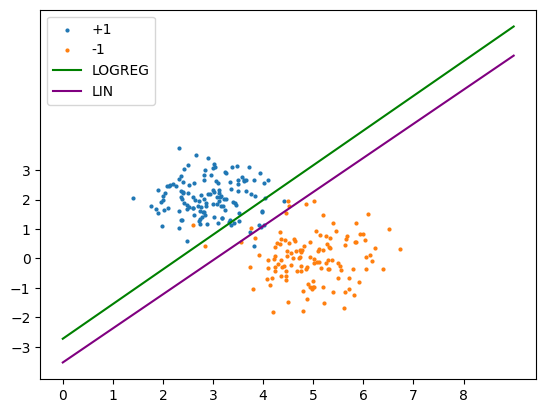

In [19]:
maskpos = np.ravel(y_train_label==1)
maskneg = np.ravel(y_train_label==-1)
plt.scatter(np.ravel(x_train_data[maskpos][:,1]),np.ravel(x_train_data[maskpos][:,2]),label="+1",s=4)
plt.scatter(np.ravel(x_train_data[maskneg][:,1]),np.ravel(x_train_data[maskneg][:,2]),label="-1",s=4)
plt.legend()

x = np.linspace(0, 9, 100)
a,b,c = getabc(w_LOGREG)
y = -1 * a/b * x + -1 * c/b
plt.plot(x,y,color="green",label="LOGREG")
x = np.linspace(0, 9, 100)
a,b,c = getabc(w_LIN)
y = -1 * a/b * x + -1 * c/b
plt.plot(x,y,color="purple",label="LIN")
plt.legend()
plt.plot()
plt.xticks(list(range(0,9)))
plt.yticks(list(range(-3,4)))
plt.savefig("outlier_train")

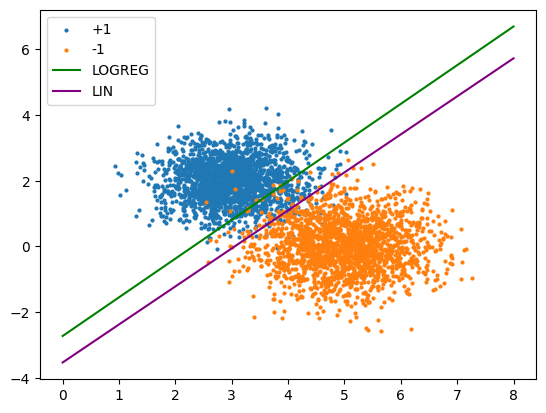

In [14]:
maskpos = np.ravel(y_test_label==1)
maskneg = np.ravel(y_test_label==-1)
plt.scatter(np.ravel(x_test_data[maskpos][:,1]),np.ravel(x_test_data[maskpos][:,2]),label="+1",s=4)
plt.scatter(np.ravel(x_test_data[maskneg][:,1]),np.ravel(x_test_data[maskneg][:,2]),label="-1",s=4)
x = np.linspace(0, 8, 100)
a,b,c = getabc(w_LOGREG)
y = -1 * a/b * x + -1 * c/b
plt.plot(x,y,color="green",label="LOGREG")
x = np.linspace(0, 8, 100)
a,b,c = getabc(w_LIN)
y = -1 * a/b * x + -1 * c/b
plt.plot(x,y,color="purple",label="LIN")
plt.legend()
plt.savefig("outlier_test")